<a href="https://colab.research.google.com/github/pdpranavkumar/lecture1/blob/master/regularized_linear_regression_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
boston = load_boston()
boston.data.shape

(506, 13)

# extract tinput and response variables
# meaning of each varible is in link above


In [4]:
feature_num = 7 
boston = load_boston()
x = boston.data[:, :feature_num]
y = boston.target
features = boston .feature_names[:feature_num]
pd.DataFrame(x, columns = features).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2


*   CRIM - per capita crime rate by town
*   ZN - proportion of residential land zoned for lots over 25,000 sq.ft
*   INDUS - proportion of non-retail business acres per town.
*   CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
*   NOX - nitric oxides concentration (parts per 10 million)
*  RM - average number of rooms per dwelling
*   AGE - proportion of owner-occupied units built prior to 1940









In [5]:
y[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

#split into training and testing sets and standardize them

In [6]:
x_train,x_test,y_train, y_test = train_test_split(x,y,random_state =1)
std = StandardScaler()
x_train_std = std.fit_transform(x_train)
x_test_std = std.transform(x_test)


#loop through different penalty score(alpha) and obtain the estimated coefficient(weights)


In [7]:
alphas = 10 ** np.arange(1, 5)
print('different alpha values:', alphas)


different alpha values: [   10   100  1000 10000]


# stores the weights of each feature

In [8]:
ridge_weight = []
for alpha in alphas:    
    ridge = Ridge(alpha = alpha, fit_intercept = True)
    ridge.fit(x_train_std, y_train)
    ridge_weight.append(ridge.coef_)

In [9]:
alphas

array([   10,   100,  1000, 10000])

In [10]:
ridge_weight

[array([-1.49246448,  0.37088936, -0.70836731,  1.08568161, -0.80970633,
         4.4075122 , -0.80450999]),
 array([-1.30486468,  0.5170331 , -0.85951603,  0.96594376, -0.81006847,
         3.54696735, -0.74796938]),
 array([-0.6486645 ,  0.4993468 , -0.67576213,  0.39800779, -0.61503278,
         1.33852138, -0.56022566]),
 array([-0.11842591,  0.11262874, -0.1443168 ,  0.05431575, -0.13553009,
         0.20563081, -0.12574102])]

In [22]:
def weight_versus_alpha_plot(weight, alphas, features):
    """
    Pass in the estimated weight, the alpha value and the names
    for the features and plot the model's estimated coefficient weight 
    for different alpha values
    """
    fig = plt.figure(figsize = (8, 6))
    
    # ensure that the weight is an array
    weight = np.array(weight)
    for col in range(weight.shape[1]):
        plt.plot(alphas, weight[:, col], label = features[col])

    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)
    
   # manually specify the coordinate of the legend
    plt.legend(bbox_to_anchor = (1.3, 0.9))
    plt.title('Coefficient Weight as Alpha Grows')
    plt.ylabel('Coefficient weight')
    plt.xlabel('alpha')
    return fig

#change the deafault figure and font size

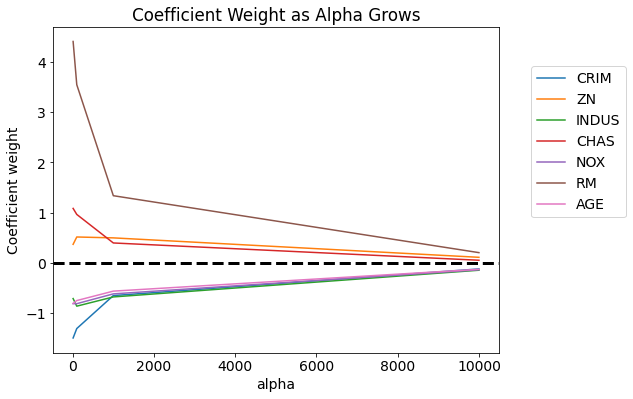

In [30]:
plt.rcParams['figure.figsize'] = 20,12
plt.rcParams['font.size'] = 14

ridge_fig = weight_versus_alpha_plot(ridge_weight, alphas, features)

#does the same thing above expect for lasso


different alpha values: [0.01, 0.1, 1, 5, 8]


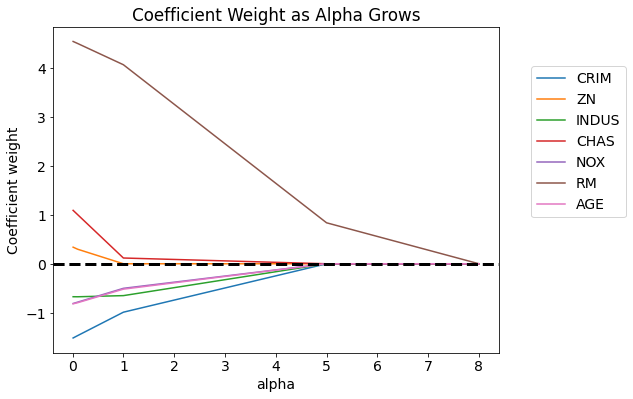

In [38]:
alphas = [0.01, 0.1, 1, 5, 8]
print('different alpha values:', alphas)

lasso_weight = []
for alpha in alphas:    
    lasso = Lasso(alpha = alpha, fit_intercept = True)
    lasso.fit(x_train_std, y_train)
    lasso_weight.append(lasso.coef_)

lasso_fig = weight_versus_alpha_plot(lasso_weight, alphas, features)